Exercício 1 DISRUPTIVE ARCHITECTURES: IOT, IOB & IA

2TDSPS

96409 - Leonardo Guimarães de Lima Marques

97385 - José Carlos da Silva

97569 - Maria Luiza de Goveia Lima

96906 - Mariana Marques Sabio

96881 - Vinícius de Abreu Pena


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#Carregando os dados
obt_infantis = '/content/obitosinfantis_periodo.csv'
dados = pd.read_csv(obt_infantis, sep=';')

In [ ]:
dados.head(10)

,cod_ibge,ano,ob_menores_1ano,ob_menores_7dias,ob_28dias_a_364dias,ob_7_a_27dias,nascidos_vivos
0,3500000,2022,4.0,4.0,0.0,0.0,186.0
1,3500105,2022,4.0,2.0,1.0,1.0,388.0
2,3500204,2022,0.0,NaN,NaN,NaN,57.0
3,3500303,2022,3.0,2.0,0.0,1.0,390.0
4,3500402,2022,1.0,0.0,0.0,1.0,67.0
5,3500501,2022,1.0,1.0,0.0,0.0,195.0
6,3500550,2022,0.0,NaN,NaN,NaN,65.0
7,3500600,2022,0.0,NaN,NaN,NaN,24.0
8,3500709,2022,3.0,2.0,1.0,0.0,473.0
9,3500758,2022,1.0,1.0,0.0,0.0,71.0


In [ ]:
print(dados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14858 entries, 0 to 14857
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cod_ibge             14858 non-null  int64  
 1   ano                  14858 non-null  int64  
 2   ob_menores_1ano      14314 non-null  float64
 3   ob_menores_7dias     13921 non-null  float64
 4   ob_28dias_a_364dias  13921 non-null  float64
 5   ob_7_a_27dias        13921 non-null  float64
 6   nascidos_vivos       14858 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 812.7 KB
None


Análise exploratória


In [ ]:
#Vou utilizar o metódo describe para gerar métricas como min, max, desvio padrão, contagem e mediana.
desc = dados.describe()
print(desc)

           cod_ibge           ano  ob_menores_1ano  ob_menores_7dias  \
count  1.485800e+04  14858.000000     14314.000000      13921.000000   
mean   3.528653e+06   2011.000000        12.128056          6.181883   
std    1.671314e+04      6.633473        88.660313         41.999283   
min    3.500000e+06   2000.000000         0.000000          0.000000   
25%    3.514502e+06   2005.000000         1.000000          0.000000   
50%    3.528650e+06   2011.000000         2.000000          1.000000   
75%    3.543204e+06   2017.000000         7.000000          4.000000   
max    3.557303e+06   2022.000000      3277.000000       1597.000000   

       ob_28dias_a_364dias  ob_7_a_27dias  nascidos_vivos  
count         13921.000000   13921.000000    14858.000000  
mean              3.896200       2.392357      845.198584  
std              30.059038      18.051127     6588.176616  
min               0.000000       0.000000        1.005000  
25%               0.000000       0.000000       60.

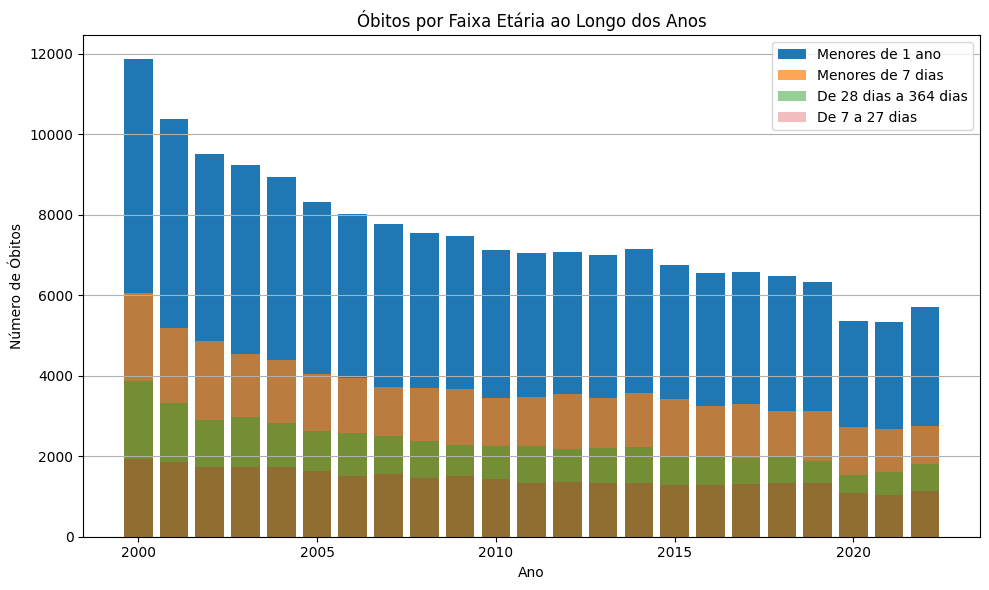

In [ ]:
#Agrupando os dados por ano e somando os óbitos em cada categoria
obitos_por_ano = dados.groupby('ano').sum().reset_index()

#Plotando informações de óbitos por ano
plt.figure(figsize=(10, 6))
plt.bar(obitos_por_ano['ano'], obitos_por_ano['ob_menores_1ano'], label='Menores de 1 ano')
plt.bar(obitos_por_ano['ano'], obitos_por_ano['ob_menores_7dias'], label='Menores de 7 dias', alpha=0.7)
plt.bar(obitos_por_ano['ano'], obitos_por_ano['ob_28dias_a_364dias'], label='De 28 dias a 364 dias', alpha=0.5)
plt.bar(obitos_por_ano['ano'], obitos_por_ano['ob_7_a_27dias'], label='De 7 a 27 dias', alpha=0.3)

plt.xlabel('Ano')
plt.ylabel('Número de Óbitos')
plt.title('Óbitos por Faixa Etária ao Longo dos Anos')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

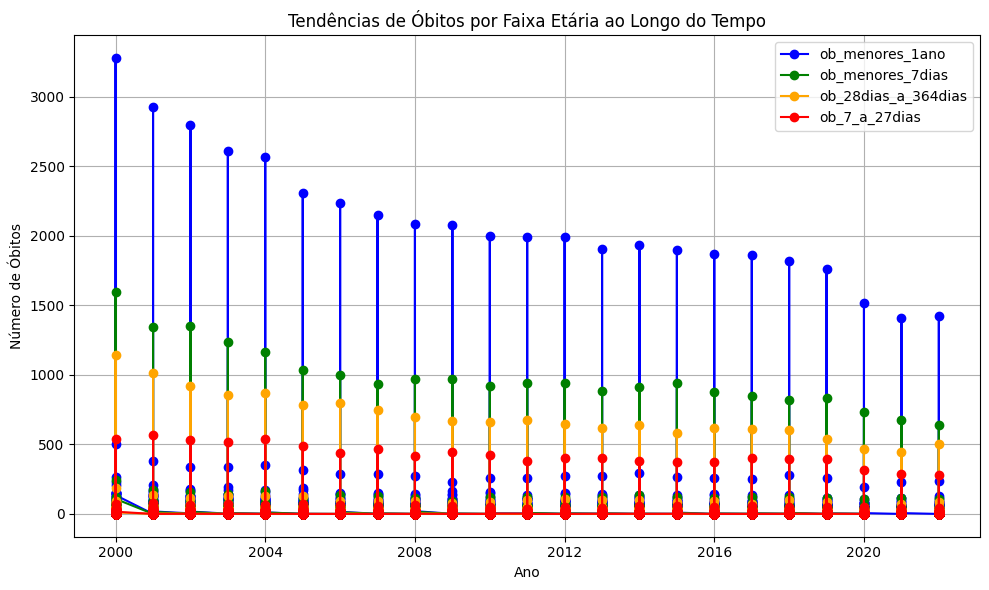

In [ ]:
# Convertendo o ano para formato de data
dados['data'] = pd.to_datetime(dados['ano'], format='%Y')

# Definindo a coluna de data como índice
dados = dados.set_index('data')

cores = ['blue', 'green', 'orange', 'red']

# Plot das tendências ao longo do tempo para cada categoria de óbito
plt.figure(figsize=(10, 6))

for i, coluna in enumerate(['ob_menores_1ano', 'ob_menores_7dias', 'ob_28dias_a_364dias', 'ob_7_a_27dias']):
    plt.plot(dados.index, dados[coluna], marker='o', label=coluna, color=cores[i])

plt.xlabel('Ano')
plt.ylabel('Número de Óbitos')
plt.title('Tendências de Óbitos por Faixa Etária ao Longo do Tempo')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

PCA


> Bloco com recuo



In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans


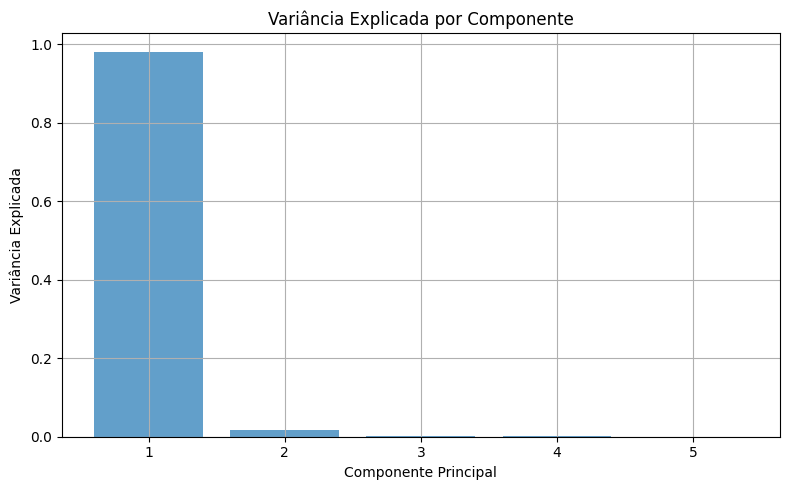

In [ ]:
# Selecionando apenas as colunas numéricas para o PCA
dados_numericos = dados.drop(['cod_ibge', 'ano'], axis=1)

# Tratamento de valores faltantes
dados_numericos = dados_numericos.dropna()


scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(dados_numericos)

# Aplicando o PCA
pca = PCA()
dados_pca = pca.fit_transform(dados_normalizados)

# Variância explicada por cada componente
variancia_explicada = pca.explained_variance_ratio_

# Plot da variância explicada por cada componente
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(variancia_explicada) + 1), variancia_explicada, alpha=0.7, align='center')
plt.xlabel('Componente Principal')
plt.ylabel('Variância Explicada')
plt.title('Variância Explicada por Componente')
plt.grid(True)
plt.tight_layout()
plt.show()

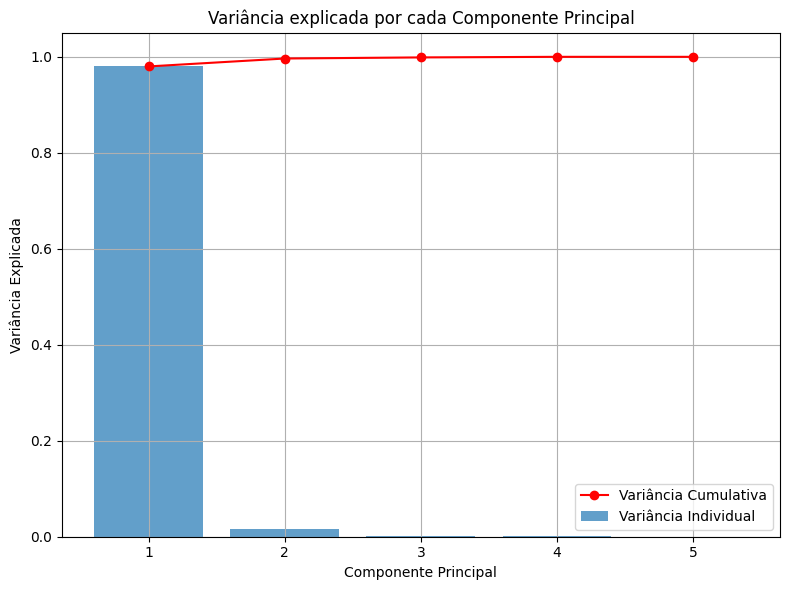

In [ ]:
# Aplicando o PCA considerando a quantidade de óbitos por ano
pca = PCA()
componentes = pca.fit_transform(dados_normalizados)

# Variância explicada por cada componente
variancia_explicada = pca.explained_variance_ratio_

# Gráfico da variância explicada por cada componente
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(variancia_explicada) + 1), variancia_explicada, alpha=0.7, align='center')
plt.plot(range(1, len(variancia_explicada) + 1), np.cumsum(variancia_explicada), marker='o', color='red')
plt.xlabel('Componente Principal')
plt.ylabel('Variância Explicada')
plt.title('Variância explicada por cada Componente Principal')
plt.legend(['Variância Cumulativa', 'Variância Individual'])
plt.grid(True)
plt.tight_layout()
plt.show()

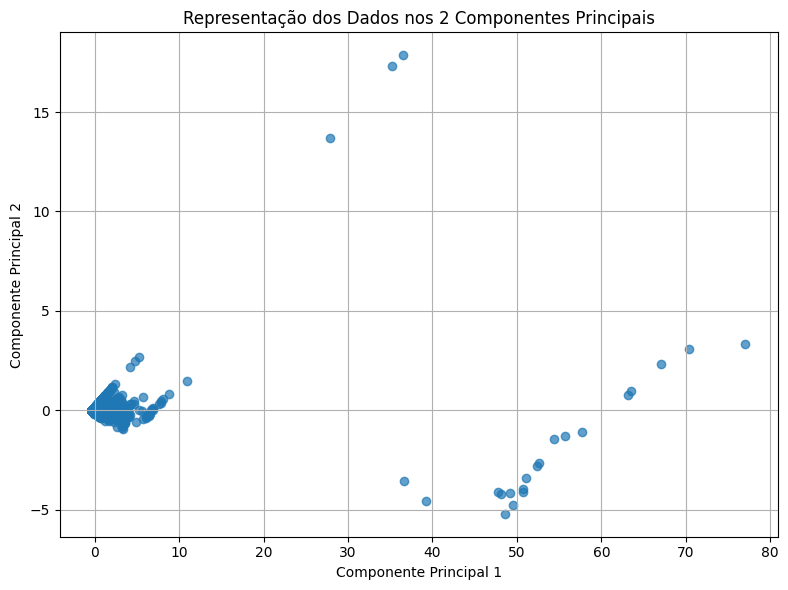

In [ ]:
# Redução para os dois primeiros componentes principais
pca = PCA(n_components=2)
componentes_reduzidos = pca.fit_transform(dados_normalizados)

# Visualização dos dados reduzidos
plt.figure(figsize=(8, 6))
plt.scatter(componentes_reduzidos[:, 0], componentes_reduzidos[:, 1], alpha=0.7)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Representação dos Dados nos 2 Componentes Principais')
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


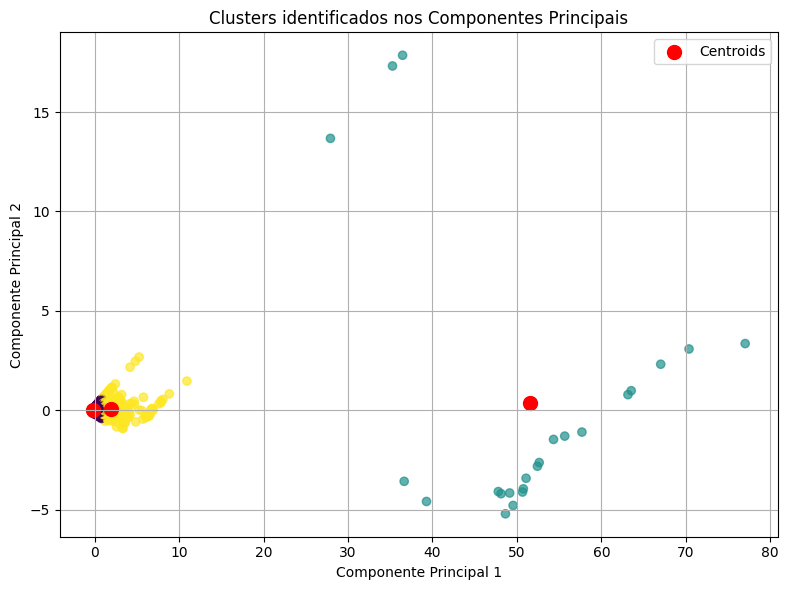

In [ ]:
# Aplicando K-Means nos dados reduzidos pelos componentes principais
kmeans = KMeans(n_clusters=3, random_state=42)  # Defina o número de clusters desejado
clusters = kmeans.fit_predict(componentes_reduzidos)

# Visualização dos clusters nos dados reduzidos
plt.figure(figsize=(8, 6))
plt.scatter(componentes_reduzidos[:, 0], componentes_reduzidos[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', s=100, c='red', label='Centroids')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters identificados nos Componentes Principais')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

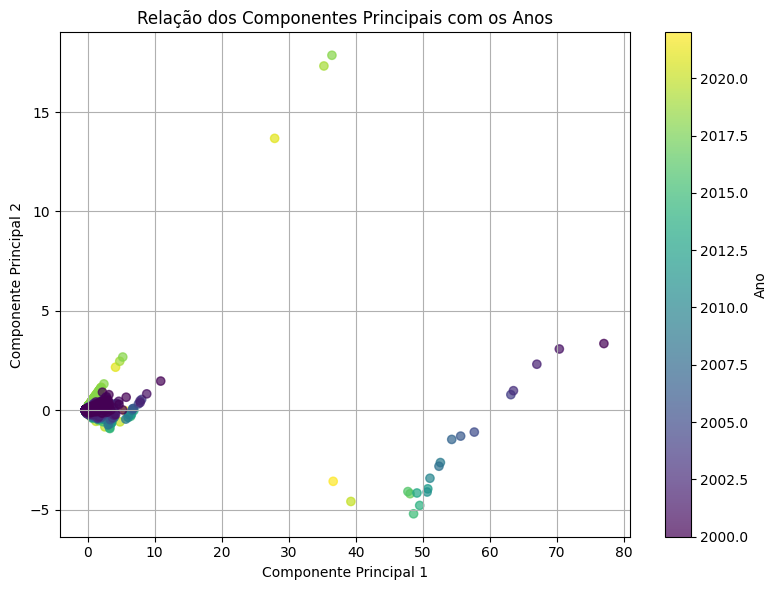

In [ ]:
# Ajustando os dados para que tenham o mesmo tamanho
dados_validos = dados.dropna().iloc[:len(componentes)]

# Plot dos componentes principais em relação aos anos
plt.figure(figsize=(8, 6))
plt.scatter(
    componentes[:, 0],
    componentes[:, 1],
    c=dados_validos.index.year[:len(componentes)],
    cmap='viridis',
    alpha=0.7
)
plt.colorbar(label='Ano')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Relação dos Componentes Principais com os Anos')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
print("Variância explicada por cada componente:")
for i, variance_ratio in enumerate(variancia_explicada):
    print(f"PC{i+1}: {variance_ratio:.2f}")


Variância explicada por cada componente:
PC1: 0.98
PC2: 0.02
PC3: 0.00
PC4: 0.00
PC5: 0.00


In [ ]:
# Reconstrução dos dados originais a partir dos 2 componentes principais
dados_reconstruidos = pca.inverse_transform(componentes)

# Convertendo os dados reconstruídos de volta para o DataFrame original
dados_reconstruidos_df = pd.DataFrame(
    dados_reconstruidos,
    columns=dados_numericos.columns,  # Todas as colunas numéricas
    index=dados_numericos.index  # Índice dos dados utilizados no PCA
)

# Exibindo DataFrame resultante após aplicação do PCA
print("\nDataFrame após aplicação do PCA:")
print(dados_reconstruidos_df.head())


DataFrame após aplicação do PCA:
            ob_menores_1ano  ob_menores_7dias  ob_28dias_a_364dias  \
data                                                                 
2022-01-01        -0.102518         -0.102330            -0.102382   
2022-01-01        -0.091834         -0.091593            -0.091447   
2022-01-01        -0.102756         -0.102450            -0.102191   
2022-01-01        -0.120295         -0.120082            -0.120168   
2022-01-01        -0.128518         -0.128169            -0.127936   

            ob_7_a_27dias  nascidos_vivos  
data                                       
2022-01-01      -0.101877       -0.103772  
2022-01-01      -0.091872       -0.075579  
2022-01-01      -0.103101       -0.075981  
2022-01-01      -0.119467       -0.123888  
2022-01-01      -0.128661       -0.103192  


In [1]:
# Exibir DataFrame resultante após aplicação do PCA
print("\nDataFrame após aplicação do PCA:")
print(dados_reconstruidos_df.head())


DataFrame após aplicação do PCA:


NameError: ignored

Desde os anos 2000, a redução da mortalidade infantil tem sido um resultado significativo de avanços na saúde global. Esses avanços foram impulsionados por melhorias no acesso a cuidados de saúde básicos, como vacinação, tratamento de doenças infecciosas, saneamento básico e educação em saúde materna e infantil. A implementação de estratégias eficazes, incluindo iniciativas de organizações internacionais, programas governamentais e parcerias público-privadas, desempenhou um papel crucial na redução das taxas de mortalidade infantil. É possível verificar essa diminuição nbas plotagens comparativas de ano a ano e a quantidade de óbitos.